# Binary and Multi-Class Classification

### Binary Classification

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

diabetes = pd.read_csv("data/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",	"Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
label = "Outcome"
X, y = diabetes[features].values, diabetes[label].values

print(X.shape)
print(y.shape)

(768, 8)
(768,)


### Split the dataset

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

X_train: (614, 8) 
X_test: (154, 8) 
y_train: (614,) 
y_test: (154,)


## Prepare Data

### Logistic Regression

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

numeric_features = [0, 1, 2, 3, 4, 5, 6, 7]
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)])

reg = 0.01  # regularization parameter
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("logregressor", LogisticRegression(C=1/reg, solver="liblinear"))])

model = pipeline.fit(X_train, y_train)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])

In [48]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ', y_test)

Predicted labels:  [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
Actual labels:     [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]


`Precision`: Of the predictions the model made for this class, what proportion were correctly classified?  
* TP / (TP + FP)  Of all positive predictions, how many are actually positives.

`Recall`: Out of all positive instances in the data set, how many did the model correctly identify?  
* TP (TP + FN)

`F1-Score`: An average metric that takes both precision and recall into account.  
`Support`: How many instances of this class are there in the test dataset?

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy score: {accuracy_score(y_true=y_test, y_pred=predictions)}")
print(f"Overall Precision: {precision_score(y_true=y_test, y_pred=predictions)}")
print(f"Overall Recall: {recall_score(y_true=y_test, y_pred=predictions)}")
print(f"F1-Score Recall: {f1_score(y_true=y_test, y_pred=predictions)}")

Accuracy score: 0.7532467532467533
Overall Precision: 0.6491228070175439
Overall Recall: 0.6727272727272727
F1-Score Recall: 0.6607142857142857


In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=predictions))

[[79 20]
 [18 37]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [52]:
y_scores = model.predict_proba(X_test)
y_scores[:10]

array([[0.72524855, 0.27475145],
       [0.81500409, 0.18499591],
       [0.88724817, 0.11275183],
       [0.83218676, 0.16781324],
       [0.53178217, 0.46821783],
       [0.56137278, 0.43862722],
       [0.98468624, 0.01531376],
       [0.33147828, 0.66852172],
       [0.46115262, 0.53884738],
       [0.22497511, 0.77502489]])

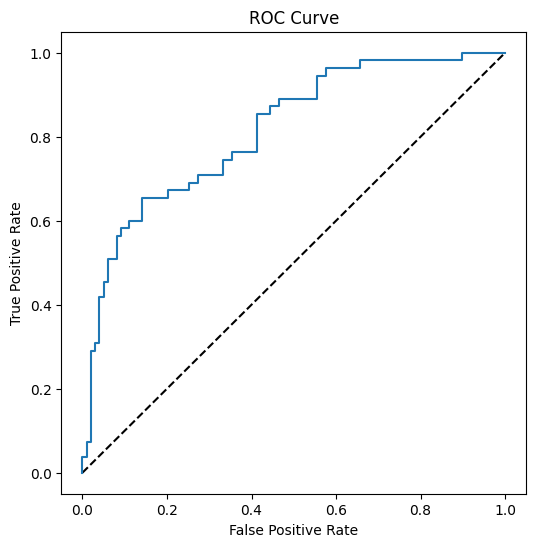

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_scores[:, 1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

model = pipeline.fit(X_train, y_train)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('random_forest', RandomForestClassifier(random_state=42))])

In [59]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ', y_test)

Predicted labels:  [0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
Actual labels:     [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]


In [60]:
print(f"Accuracy score: {accuracy_score(y_true=y_test, y_pred=predictions)}")
print(f"Overall Precision: {precision_score(y_true=y_test, y_pred=predictions)}")
print(f"Overall Recall: {recall_score(y_true=y_test, y_pred=predictions)}")
print(f"F1-Score Recall: {f1_score(y_true=y_test, y_pred=predictions)}")

Accuracy score: 0.7207792207792207
Overall Precision: 0.6071428571428571
Overall Recall: 0.6181818181818182
F1-Score Recall: 0.6126126126126126


# Multiclass Classification

In [168]:
penguins = pd.read_csv("data/penguins.csv")
print(f"Shape: {penguins.shape}")
penguins.head()

Shape: (344, 7)


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,Adelie
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,Adelie


In [169]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                334 non-null    object 
 6   species            344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [170]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [171]:
penguins.isnull().sum()

island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
species               0
dtype: int64

In [172]:
penguins[penguins.isnull().any(axis=1)]

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
8,Torgersen,34.1,18.1,193.0,3475.0,NaN,Adelie
9,Torgersen,42.0,20.2,190.0,4250.0,NaN,Adelie
10,Torgersen,37.8,17.1,186.0,3300.0,NaN,Adelie
11,Torgersen,37.8,17.3,180.0,3700.0,NaN,Adelie
47,Dream,37.5,18.9,179.0,2975.0,NaN,Adelie
246,Biscoe,44.5,14.3,216.0,4100.0,NaN,Gentoo
286,Biscoe,46.2,14.4,214.0,4650.0,NaN,Gentoo
324,Biscoe,47.3,13.8,216.0,4725.0,NaN,Gentoo
339,Biscoe,NaN,NaN,NaN,NaN,NaN,Gentoo


In [173]:
penguins.drop([3, 339], inplace=True)

In [174]:
penguins[penguins.isnull().any(axis=1)]

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
8,Torgersen,34.1,18.1,193.0,3475.0,NaN,Adelie
9,Torgersen,42.0,20.2,190.0,4250.0,NaN,Adelie
10,Torgersen,37.8,17.1,186.0,3300.0,NaN,Adelie
11,Torgersen,37.8,17.3,180.0,3700.0,NaN,Adelie
47,Dream,37.5,18.9,179.0,2975.0,NaN,Adelie
246,Biscoe,44.5,14.3,216.0,4100.0,NaN,Gentoo
286,Biscoe,46.2,14.4,214.0,4650.0,NaN,Gentoo
324,Biscoe,47.3,13.8,216.0,4725.0,NaN,Gentoo


## Prepare the data

In [175]:
penguin_features = ['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
penguin_label = 'species'

X = penguins[penguin_features].values
y = penguins[penguin_label].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (273, 6)
X_test: (69, 6)
y_train: (273,)
y_test: (69,)


In [176]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_features = [1, 2, 3, 4]
num_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

cat_features = [0, 5]
cat_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)])

reg = 0.01
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("logregressor", LogisticRegression(C=1/reg, solver='lbfgs', max_iter=1000))])

model = pipeline.fit(X_train, y_train)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 5])])),
                ('logregressor', LogisticRegression(C=100.0, max_iter=1000))])

In [177]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ', y_test)

Predicted labels:  ['Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Chinstrap'
 'Gentoo' 'Chinstrap' 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Chinstrap'
 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap'
 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Chinstrap'
 'Adelie' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Chinstrap'
 'Gentoo' 'Adelie' 'Adelie' 'Gentoo']
Actual labels:     ['Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Chinstrap'
 'Gentoo' 'Chinstrap' 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Chinstrap'
 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Gen

In [178]:
print(f"Accuracy score: {accuracy_score(y_true=y_test, y_pred=predictions)}")
print(f"Overall Precision: {precision_score(y_true=y_test, y_pred=predictions, average='macro')}")
print(f"Overall Recall: {recall_score(y_true=y_test, y_pred=predictions, average='macro')}")
print(f"F1-Score Recall: {f1_score(y_true=y_test, y_pred=predictions, average='macro')}")

Accuracy score: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
F1-Score Recall: 1.0


In [179]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [180]:
print(confusion_matrix(y_true=y_test, y_pred=predictions))

[[30  0  0]
 [ 0 14  0]
 [ 0  0 25]]


In [181]:
penguin_prob = model.predict_proba(X_test)
penguin_prob[:10]

array([[9.99903749e-01, 8.77812297e-05, 8.46977221e-06],
       [9.99995539e-01, 2.32636105e-06, 2.13438532e-06],
       [6.17434470e-09, 6.29752401e-05, 9.99937019e-01],
       [7.02609329e-06, 5.31642866e-06, 9.99987657e-01],
       [4.14332881e-05, 9.99958457e-01, 1.09709292e-07],
       [1.00000000e+00, 2.18117691e-14, 1.32600527e-11],
       [2.44604221e-05, 9.99967999e-01, 7.54069925e-06],
       [1.99688972e-08, 8.29988800e-06, 9.99991680e-01],
       [2.28063599e-05, 9.99956470e-01, 2.07234398e-05],
       [9.81416444e-07, 9.99997784e-01, 1.23441471e-06]])